In [1]:
import pandas
table1 = pandas.read_csv('customer_details.csv')
table2 = pandas.read_csv('customer_policy_details.csv')
print(table1.head())
print(table2.head())

     0       1     2    3     4    5          6    7
0  1.0    Male  44.0  1.0  28.0  0.0  > 2 Years  Yes
1  2.0    Male  76.0  1.0   3.0  0.0   1-2 Year   No
2  3.0    Male  47.0  1.0  28.0  0.0  > 2 Years  Yes
3  4.0    Male  21.0  1.0  11.0  1.0   < 1 Year   No
4  5.0  Female  29.0  1.0  41.0  1.0   < 1 Year   No
     0        1      2      3    4
0  1.0  40454.0   26.0  217.0  1.0
1  2.0  33536.0   26.0  183.0  0.0
2  3.0  38294.0   26.0   27.0  1.0
3  4.0  28619.0  152.0  203.0  0.0
4  5.0  27496.0  152.0   39.0  0.0


In [2]:
table1_label = {'0':'customer_id', '1':'gender', '2':'age', '3':'driving_licence_presence',
               '4':'region_code', '5':'previously_insured', '6':'vehicle_age', '7':'vehicle_damage'}

In [10]:
table1.dropna(subset=['0'],inplace=True)
print(f'number of cells of {table1_label[str(0)]} with null values = {table1[str(0)].isnull().sum()}')

number of cells of customer_id with null values = 0


In [11]:
for i in range(2,6):
    table1[str(i)].fillna(table1[str(i)].mean(),inplace=True)
    print(f'number of cells of {table1_label[str(i)]} with null values = {table1[str(i)].isnull().sum()}')

number of cells of age with null values = 0
number of cells of driving_licence_presence with null values = 0
number of cells of region_code with null values = 0
number of cells of previously_insured with null values = 0


In [16]:
for i in range(1,6,7):
    table1[str(i)].fillna(table1[str(i)].mode()[0],inplace=True)
    print(f'number of cells of {table1_label[str(i)]} with null values = {table1[str(i)].isnull().sum()}')

number of cells of gender with null values = 0


In [17]:
table2_label = {'0':'customer_id', '1':'annual_premium_INR', '2':'Sales_channel_code', '3':'vintage', '4':'response'}

In [18]:
for i in range(table2.shape[1]):
    print(f'number of cells of {table2_label[str(i)]} with null values is {table2[str(i)].isnull().sum()}')
table2.info()

number of cells of customer_id with null values is 387
number of cells of annual_premium_INR with null values is 346
number of cells of Sales_channel_code with null values is 400
number of cells of vintage with null values is 388
number of cells of response with null values is 361
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       380722 non-null  float64
 1   1       380763 non-null  float64
 2   2       380709 non-null  float64
 3   3       380721 non-null  float64
 4   4       380748 non-null  float64
dtypes: float64(5)
memory usage: 14.5 MB


In [19]:
table2.dropna(subset=['0'],inplace = True)
print(f'number of cells of {table1_label[str(0)]} with null values is {table2[str(0)].isnull().sum()}')

number of cells of customer_id with null values is 0


In [20]:
for i in range(1,5):
    table2[str(i)].fillna(table2[str(i)].mean(), inplace=True)
    print(f'number of cells of {table2_label[str(i)]} with null values is {table2[str(i)].isnull().sum()}')

number of cells of annual_premium_INR with null values is 0
number of cells of Sales_channel_code with null values is 0
number of cells of vintage with null values is 0
number of cells of response with null values is 0


In [21]:
table1_limits={}
for i in range(2,6):
    computations = table1[str(i)].describe(percentiles=[.25,.75])
    mean = computations.values[1]
    Q1=computations.values[4]
    Q3=computations.values[6]
    IQR=Q3-Q1
    II=Q1-1.5*IQR
    hI=Q3+1.5*IQR
    table1_limits[str(i)]=(II,hI)
table1_limits

{'2': (-11.0, 85.0), '3': (1.0, 1.0), '4': (-15.0, 65.0), '5': (-1.5, 2.5)}

In [23]:
table1_outliers={'2':0,'3':0,'4':0,'5':0,'6':0}

for j in table1.index:
    for i in range(2,6):
        if(table1_limits[str(i)][0]!=table1_limits[str(i)][1]) and (table1.loc[j,str(i)]>table1_limits[str(i)][1] or table1.loc[j,str(i)]<table1_limits[str(i)][0]):
            table1_outliers[str(i)]+=1
table1_outliers

{'2': 0, '3': 0, '4': 0, '5': 0, '6': 0}

In [24]:
for j in table1.index:
    for i in range(2,6):
        if table1.loc[j, str(i)]<table1_limits[str(i)][0]:
            table1.loc[j, str(i)]=table1[str(i)].mean()
        if table1.loc[j, str(i)]>table1_limits[str(i)][1]:
            table1.loc[j, str(i)]=table1[str(i)].mean()
                                                    

In [26]:
table2_limits={}
for i in range(1,5):
    computations = table2[str(i)].describe(percentiles=[.25,.75])
    mean = computations.values[1]
    Q1 = computations.values[4]
    Q3 = computations.values[6]
    IQR = Q3-Q1
    II = Q1-1.5*IQR
    hI = Q3+1.5*IQR
    table2_limits[str(i)] = (II,hI)
table2_limits

{'1': (1952.375, 61855.375),
 '2': (-155.5, 336.5),
 '3': (-135.5, 444.5),
 '4': (0.0, 0.0)}

In [28]:
table2_outliers = {'1':0, '2':0, '3':0, '4':0, '5':0}

for j in table2.index:
    for i in range(1,5):
        if(table2_limits[str(i)][0]!=table2_limits[str(i)][1]) and (table2.loc[j, str(i)]>table2_limits[str(i)][1] or table2.loc[j, str(i)]<table2_limits[str(i)][0]):
            table2_outliers[str(i)]+=1
table2_outliers          

{'1': 10332, '2': 0, '3': 0, '4': 0, '5': 0}

In [29]:
for j in table2.index:
    for i in range(1,5):
        if table2.loc[j, str(i)]<table2_limits[str(i)][0]:
            table2.loc[j, str(i)]=table2[str(i)].mean()
        if table2.loc[j, str(i)]>table2_limits[str(i)][1]:
            table2.loc[j,str(i)]=table2[str(i)].mean()

In [31]:
table1.apply(lambda x:x.str.strip() if x.dtype=='object' else x)

,0,1,2,3,4,5,6,7
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [32]:
table2.apply(lambda x:x.str.strip() if x.dtype=='object' else x)

,0,1,2,3,4
0,1.0,40454.0,26.0,217.0,0.122526
1,2.0,33536.0,26.0,183.0,0.000000
2,3.0,38294.0,26.0,27.0,0.122523
3,4.0,28619.0,152.0,203.0,0.000000
4,5.0,27496.0,152.0,39.0,0.000000
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.000000
381105,381106.0,40016.0,152.0,131.0,0.000000
381106,381107.0,35118.0,160.0,161.0,0.000000
381107,381108.0,44617.0,124.0,74.0,0.000000


In [33]:
table1.apply(lambda x:x.str.lower() if x.dtype=='object' else x)

,0,1,2,3,4,5,6,7
0,1.0,male,44.0,1.0,28.0,0.0,> 2 years,yes
1,2.0,male,76.0,1.0,3.0,0.0,1-2 year,no
2,3.0,male,47.0,1.0,28.0,0.0,> 2 years,yes
3,4.0,male,21.0,1.0,11.0,1.0,< 1 year,no
4,5.0,female,29.0,1.0,41.0,1.0,< 1 year,no
...,...,...,...,...,...,...,...,...
381104,381105.0,male,74.0,1.0,26.0,1.0,1-2 year,no
381105,381106.0,male,30.0,1.0,37.0,1.0,< 1 year,no
381106,381107.0,male,21.0,1.0,30.0,1.0,< 1 year,no
381107,381108.0,female,68.0,1.0,14.0,0.0,> 2 years,yes


In [34]:
table2.apply(lambda x:x.str.lower() if x.dtype=='object' else x)

,0,1,2,3,4
0,1.0,40454.0,26.0,217.0,0.122526
1,2.0,33536.0,26.0,183.0,0.000000
2,3.0,38294.0,26.0,27.0,0.122523
3,4.0,28619.0,152.0,203.0,0.000000
4,5.0,27496.0,152.0,39.0,0.000000
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.000000
381105,381106.0,40016.0,152.0,131.0,0.000000
381106,381107.0,35118.0,160.0,161.0,0.000000
381107,381108.0,44617.0,124.0,74.0,0.000000


In [35]:
table1.drop_duplicates(inplace=True)

In [36]:
table2.drop_duplicates(inplace=True)

In [37]:
data = pandas.merge(table1, table2, on='0')
label = {'0':'customer_id', '1_x':'gender', '2_x':'age', '3_x':'driving_license_presence', '4_x':'region_code', '5':'previously_insured', '6':'vehicle_age', '7':'vahicle_damage', '1_y':'annual_premium_INR', '2_y':'sales_channel_code', '3_y':'vintage', '4_y':'responce'}
data.rename(columns=label,inplace=True)
data

,customer_id,gender,age,driving_license_presence,region_code,previously_insured,vehicle_age,vahicle_damage,annual_premium_INR,sales_channel_code,vintage,responce
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,0.122526
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.000000
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,0.122523
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.000000
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
380331,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No,30170.0,26.0,88.0,0.000000
380332,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No,40016.0,152.0,131.0,0.000000
380333,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No,35118.0,160.0,161.0,0.000000
380334,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,74.0,0.000000


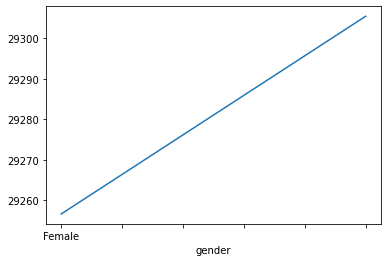

In [38]:
result4_1 = data.groupby('gender')['annual_premium_INR'].mean()
import matplotlib.pyplot as pyplot
result4_1.plot()
pyplot.show()

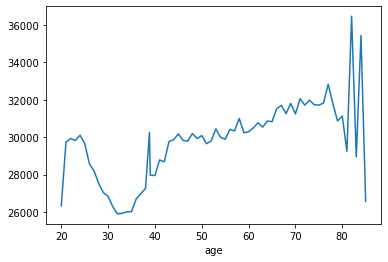

In [39]:
result4_2 = data.groupby('age')['annual_premium_INR'].mean()
import matplotlib.pyplot as pyplot
result4_2.plot()
pyplot.show()

In [41]:
print(f"male to female ration is {round(data['gender'].value_counts()[0]/data['gender'].value_counts()[1],2)}")
print(f'generally, the standard is: \n balanced data ratio: {50/50}\n slightly balanced data ratio:{round(55/45,2)}-{60/40} \n imbalanced data ratio:{80/20}-{90/10}')

male to female ration is 1.18
generally, the standard is: 
 balanced data ratio: 1.0
 slightly balanced data ratio:1.22-1.5 
 imbalanced data ratio:4.0-9.0


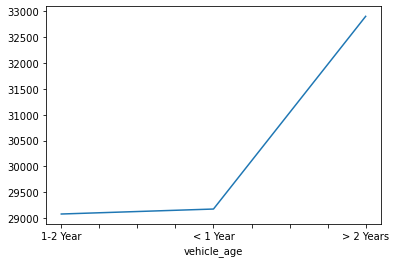

In [43]:
result4_4 = data.groupby('vehicle_age')['annual_premium_INR'].mean()
import matplotlib.pyplot as pyplot
result4_4.plot()
pyplot.show()

In [44]:
n = data['age'].corr(data['annual_premium_INR'])
if n<-0.5:
    print('trong negative relationship')
if n>0.5:
    print('strong positive relationship')
if n>-0.5 and n<0.5:
    print('There is no relationship!')

There is no relationship!
